# Preprocessing images and inference in convolutional networks

We train artificial neural networks for application in our tasks. Here, some conditions arise. Firstly, we need to prepare input data in the format and range that our network can handle. Secondly, we need to pass our data to the network properly. OpenCV helps us to perform both steps, and in this recipe we examine how to use OpenCV's `dnn` module to easily convert an image to a tensor and perform an inference.

The OpenCV `dnn` module contains a convenient function to convert an image to a tensor with preprocessing, `blobFromImage`. The arguments of this function are the input image (with one or three channels), scale values factor, output spatial size in (width, height) format, mean value to subtract, Boolean flag for whether to swap red and blue channels, and Boolean flag for whether to crop an image from the center before resizing to save the aspect ratio of the object in the image or just resize without preserving the object's proportions. The `blobFromImage` function goes through the following steps while converting an image to a tensor:

1. The function resizes the image. If the crop flag is True, the input image is resized while preserving the aspect ratio. One dimension (width or height) of the image is set to a desirable value and the other is set equal or greater than the corresponding value in the size argument. Then, the resulting image from the center is cropped to the necessary size. If the crop flag is `False`, the function just resizes to the target spatial size. 
2. The function converts the values of the resized image to a floatingpoint type, if necessary. 
3. The function swaps the first and last channels if the corresponding argument is True. This is necessary because OpenCV gives images in the BGR channel order after loading, but some Deep Learning models may be trained for images with the RGB channel order. 
4. The function then subtracts the mean value from each pixel of the image. The corresponding argument may be either a three-value tuple or just a one-value tuple. If it is a three-value tuple, each value is subtracted from the corresponding channel after the channels are swapped. If it's a single value, it is subtracted from each channel. 
5. Multiply the resulting image by the scale factor (2nd argument). 
6. Convert the three-dimensional image to a four-dimensional tensor with an NCHW order of dimensions.

The `blobFromImage` function returns a four-dimensional floating-point tensor with all of the preprocessing performed.

It's important to say that the preprocessing must be the same as it was while training the model. Otherwise, the model may work poorly or even not work at all. If you've trained the model yourself, you know all the parameters. But if you've found the model on the internet, you need to examine the description of the model or training scripts to get the necessary information.

If you want to create a tensor from several images, you need to use the `blobFromImages` routine. It has the same arguments as the previous function except the first one, the first argument should be a list of images from which you want to create tensors. The images are converted into tensors in the same order as they are listed in the first argument.

To make an inference, you have to set a tensor as an input of the model with `cv2.dnn_Net.setInput` and then call `cv2.dnn_Net.forward` to get the network's output. setInput accepts a tensor that you want to be set, and optionally the name of the input. When the model has several inputs, the name of the input determines which one we want to set.

The `forward` function performs all computations from input to output, layer by layer, and returns the resulting tensor. Also, you can specify the output of which layer you need to be returned by passing a name of the layer as an argument.

One question arises, how to interpret the output of the model? The interpretation depends on the model itself. It maybe probabilities of classes for input image, segmentation maps or some more complicated structures. The only way to know exactly is to check out the information about the model's architecture and training procedure.

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2,start_3=0, end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S05\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s05\env

d:\html_doc\program\opencv\packt\s05\env\lib\site-packages
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S05\env


tensor_Nchw.shape == (1, 3, 512, 512)
1 3 512
------  ../data/Lena.png---------    Shape(512, 512, 3) image_bgR_int: uint8
[[ 96  88 196] [109  98 194] [138 121 198] [134 118 196] [105 100 193] [105  99 194] [132 117 188] ]
[[130 121 194] [167 157 200] [158 165 207] [122 133 206] [127 118 200] [169 152 200] [173 168 205] ]
------  BGR !! float-------------    Shape(512, 512, 3) image_bgR_float: float32
[[ 96.  88. 196.] [109.  98. 194.] [138. 121. 198.] [134. 118. 196.] [105. 100. 193.] [105.  99. 194.] [132. 117. 188.] ]
[[130. 121. 194.] [167. 157. 200.] [158. 165. 207.] [122. 133. 206.] [127. 118. 200.] [169. 152. 200.] [173. 168. 205.] ]
------  RGB-norm float-----------    Shape(512, 512, 3) image_Rgb_float: float32
[[196.  88.  96.] [194.  98. 109.] [198. 121. 138.] [196. 118. 134.] [193. 100. 105.] [194.  99. 105.] [188. 117. 132.] ]
[[194. 121. 130.] [200. 157. 167.] [207. 165. 158.] [206. 133. 122.] [200. 118. 127.] [200. 152. 169.] [205. 168. 173.] ]
------  tensor_chw-------

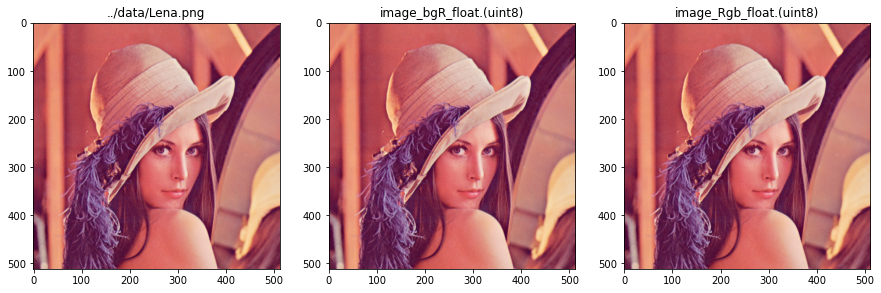

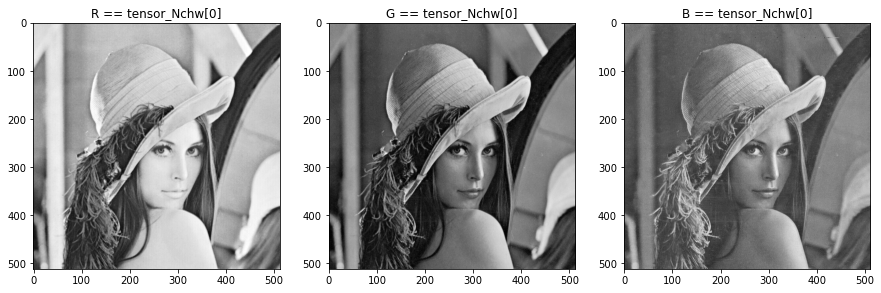

In [2]:
image = cv2.imread('../data/Lena.png', cv2.IMREAD_COLOR)


image_bgR_int = cv2.imread('../data/Lena.png', cv2.IMREAD_COLOR)
image_bgR_float = image_bgR_int.astype(np.float32)
image_Rgb_float = image_bgR_float[..., ::-1]
tensor_chw = np.transpose(image_Rgb_float, (2, 0, 1))
tensor_Nchw = tensor_chw[np.newaxis, ...]



###################################################################
print("tensor_Nchw.shape ==",tensor_Nchw.shape)
print(tensor_Nchw.shape[0],tensor_Nchw.shape[1],tensor_Nchw.shape[2])

print_image('../data/Lena.png','image_bgR_int',image_bgR_int,44,46,221,228)
print_image('BGR !! float','image_bgR_float',image_bgR_float,44,46,221,228)
print_image('RGB-norm float','image_Rgb_float',image_Rgb_float,44,46,221,228)
print_image('tensor_chw','tensor_chw',tensor_chw,0,3,44,46,221,228)
print_image('tensor_Nchw[0]','tensor_Nchw[0]',tensor_Nchw[0],0,3,44,46,221,228)
plt_view_image(plt,[["../data/Lena.png",image_bgR_int[:,:,[2,1,0]] ],
                    ["image_bgR_float.(uint8)",image_bgR_float.astype(np.uint8)[:,:,[2,1,0]]],
                    ["image_Rgb_float.(uint8)",image_Rgb_float.astype(np.uint8)]
                   ],
               figsize=(15,6),axis='on',cmap='gray')
plt_view_image(plt,[["R == tensor_Nchw[0]",tensor_Nchw[0].astype(np.uint8)[0,:,:]],
                    ["G == tensor_Nchw[0]",tensor_Nchw[0].astype(np.uint8)[1,:,:]],
                    ["B == tensor_Nchw[0]",tensor_Nchw[0].astype(np.uint8)[2,:,:]]
                   ],
               figsize=(15,6),axis='on',cmap='gray')

(1, 3, 224, 224)
------  tensor[0]----------------    Shape(3, 224, 224) tensor[0]: float32
[[21. 24. 13. 21. 20.  5. 14.] [21. 24. 13. 21. 20.  5. 14.] [18.  8. 11.  6.  6. -3.  1.] [10.  8. 15. 12. 10.  0.  7.] [ 2. 13.  1.  3. 10.  9.  5.] [10. 12. -1.  5.  5.  1.  6.] [ 6.  6.  7.  2. -6.  3.  1.] ]
[[20. 19. 14. 20. 18. 14. 16.] [20. 19. 14. 20. 18. 14. 16.] [21. 14. 16. 17. 12. 11. 12.] [14. 15. 16. 16. 17. 14.  9.] [14. 19. 10. 12. 13. 16. 13.] [14. 11. 10. 16. 15. 12. 13.] [15. 13. 16. 12. 11. 12. 11.] ]
[[103. 100. 103. 104. 104. 100.  99.] [103. 100. 103. 104. 104. 100.  99.] [104. 100. 105. 104. 104. 102. 102.] [101. 100. 102. 103. 102. 101. 102.] [101.  99. 105. 103. 102. 102. 103.] [104. 104. 104. 101. 102. 105. 103.] [105. 101. 102. 103. 103. 104. 103.] ]


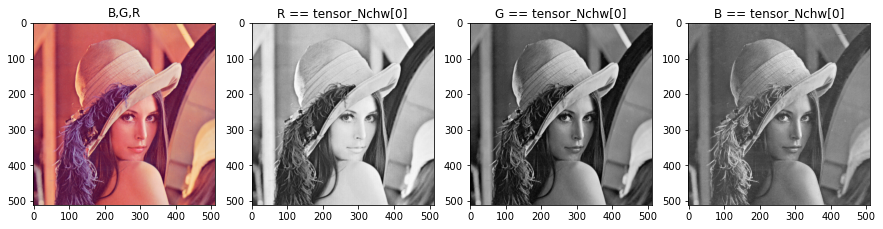

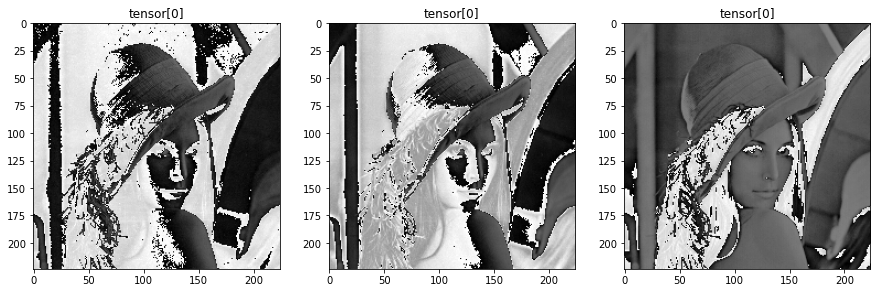

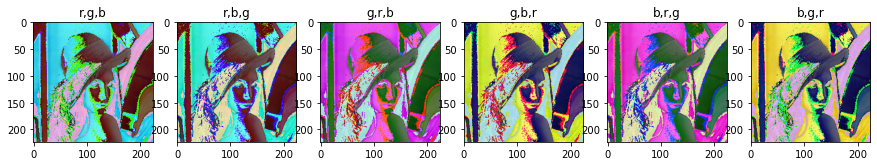

In [3]:
tensor = cv2.dnn.blobFromImage(image, 1.0, (224,224), (104,117,123), False,False);
print(tensor.shape)


##########################################################
print_image('tensor[0]','tensor[0]',tensor[0],0,4,0,7,0,7)
b = tensor[0].astype(np.uint8)[0,:,:]
g = tensor[0].astype(np.uint8)[1,:,:]
r = tensor[0].astype(np.uint8)[2,:,:]
B = tensor_Nchw[0].astype(np.uint8)[0,:,:]
G = tensor_Nchw[0].astype(np.uint8)[1,:,:]
R = tensor_Nchw[0].astype(np.uint8)[2,:,:]
plt_view_image(plt,[["B,G,R",cv2.merge((B,G,R))],
                    ["R == tensor_Nchw[0]",tensor_Nchw[0].astype(np.uint8)[0,:,:]],
                    ["G == tensor_Nchw[0]",tensor_Nchw[0].astype(np.uint8)[1,:,:]],
                    ["B == tensor_Nchw[0]",tensor_Nchw[0].astype(np.uint8)[2,:,:]]
                   ],
               figsize=(15,6),axis='on',cmap='gray')
plt_view_image(plt,[["tensor[0]",tensor[0].astype(np.uint8)[0,:,:]],
                    ["tensor[0]",tensor[0].astype(np.uint8)[1,:,:]],
                    ["tensor[0]",tensor[0].astype(np.uint8)[2,:,:]]
                   ],
               figsize=(15,6),axis='on',cmap='gray')
plt_view_image(plt,[["r,g,b",cv2.merge((r,g,b))],
                    ["r,b,g",cv2.merge((r,b,g))],
                    ["g,r,b",cv2.merge((g,r,b))],
                    ["g,b,r",cv2.merge((g,b,r))],
                    ["b,r,g",cv2.merge((b,r,g))],
                    ["b,g,r",cv2.merge((b,g,r))]
                   ]
               ,figsize=(15,6),axis='on',cmap='gray')

In [4]:
tensor_2 = cv2.dnn.blobFromImages([image, image], 1.0, (224, 224),
                                  (104, 117, 123), False, True);
print(tensor_2.shape)



###################################################
print_image('tensor[0]','tensor[0]',tensor[0],0,3,0,4,0,6)
print_image('tensor_2[0]','tensor_2[0]',tensor_2[0],0,3,0,4,0,6)
print_image('tensor_2[1]','tensor_2[1]',tensor_2[1],0,3,0,4,0,6)

(2, 3, 224, 224)
------  tensor[0]----------------    Shape(3, 224, 224) tensor[0]: float32
[[21. 24. 13. 21. 20.  5.] [21. 24. 13. 21. 20.  5.] [18.  8. 11.  6.  6. -3.] [10.  8. 15. 12. 10.  0.] ]
[[20. 19. 14. 20. 18. 14.] [20. 19. 14. 20. 18. 14.] [21. 14. 16. 17. 12. 11.] [14. 15. 16. 16. 17. 14.] ]
[[103. 100. 103. 104. 104. 100.] [103. 100. 103. 104. 104. 100.] [104. 100. 105. 104. 104. 102.] [101. 100. 102. 103. 102. 101.] ]
------  tensor_2[0]--------------    Shape(3, 224, 224) tensor_2[0]: float32
[[21. 24. 13. 21. 20.  5.] [21. 24. 13. 21. 20.  5.] [18.  8. 11.  6.  6. -3.] [10.  8. 15. 12. 10.  0.] ]
[[20. 19. 14. 20. 18. 14.] [20. 19. 14. 20. 18. 14.] [21. 14. 16. 17. 12. 11.] [14. 15. 16. 16. 17. 14.] ]
[[103. 100. 103. 104. 104. 100.] [103. 100. 103. 104. 104. 100.] [104. 100. 105. 104. 104. 102.] [101. 100. 102. 103. 102. 101.] ]
------  tensor_2[1]--------------    Shape(3, 224, 224) tensor_2[1]: float32
[[21. 24. 13. 21. 20.  5.] [21. 24. 13. 21. 20.  5.] [18.  8. 11

In [5]:
net = cv2.dnn.readNetFromCaffe('../data/bvlc_googlenet.prototxt', 
                               '../data/bvlc_googlenet.caffemodel')

In [6]:
net.setInput(tensor);
prob = net.forward();


##############################################
print(prob.shape)
print(prob[0:2,0:10])

(1, 1000)
[[8.0656946e-08 4.1095791e-06 5.8275318e-06 1.1767246e-05 5.4690472e-06
  6.5129025e-06 4.2410444e-05 3.8235803e-04 4.3130167e-06 3.0517676e-06]]


In [7]:
net.setInput(tensor, 'data');
prob = net.forward('prob');


##############################################
print(prob.shape)
print(prob[0:2,0:10])

(1, 1000)
[[8.0656946e-08 4.1095791e-06 5.8275318e-06 1.1767246e-05 5.4690472e-06
  6.5129025e-06 4.2410444e-05 3.8235803e-04 4.3130167e-06 3.0517676e-06]]


In [8]:
net.setInput(tensor_2);
prob = net.forward();


##############################################
print(prob.shape)
print(prob[0:2,0:10])

(2, 1000)
[[8.0656946e-08 4.1095791e-06 5.8275318e-06 1.1767246e-05 5.4690472e-06
  6.5129025e-06 4.2410444e-05 3.8235803e-04 4.3130167e-06 3.0517676e-06]
 [8.0656946e-08 4.1095791e-06 5.8275318e-06 1.1767246e-05 5.4690472e-06
  6.5129025e-06 4.2410444e-05 3.8235803e-04 4.3130167e-06 3.0517676e-06]]


In [9]:
net.setInput(tensor_2, 'data');
prob = net.forward('prob');


##############################################
print(prob.shape)
print(prob[0:2,0:10])

(2, 1000)
[[8.0656946e-08 4.1095791e-06 5.8275318e-06 1.1767246e-05 5.4690472e-06
  6.5129025e-06 4.2410444e-05 3.8235803e-04 4.3130167e-06 3.0517676e-06]
 [8.0656946e-08 4.1095791e-06 5.8275318e-06 1.1767246e-05 5.4690472e-06
  6.5129025e-06 4.2410444e-05 3.8235803e-04 4.3130167e-06 3.0517676e-06]]
